# Python - Pandas 

- Selecting and subsetting data  
- Data types  
- Data manipulation and processing techniques  

[Pandas Reference](http://pandas.pydata.org/pandas-docs/stable/reference/index.html)

## Series and DataFrames

In [64]:
import numpy as np
import pandas as pd

- Series

In [65]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

- DataFrames # Very similar to R dataframes

In [66]:
import pandas as pd
dates = pd.date_range('20130101', periods=6) 
# R + lubridate:  dates <- ymd("2013-01-01")+days(0:5)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [67]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
# R + tidyverse: 
# m <- matrix(rnorm(6*4), ncol = 4)
# colnames(m) <- c("A", "B", "C", "D")
# df <- as_tibble(m) %>% mutate(dates)
df

,A,B,C,D
2013-01-01,-0.072784,0.162603,-1.467090,-0.491358
2013-01-02,-0.323234,0.597184,0.488194,-0.195534
2013-01-03,0.065438,1.476617,0.125245,-0.858524
2013-01-04,1.167757,-1.307352,-0.769804,0.684242
2013-01-05,-0.720032,1.178906,0.880000,0.727453
2013-01-06,-0.833819,-0.879228,0.214297,0.645847


## Pandas vs. R

In [69]:
df.shape # R: dim(df)

(6, 4)

In [70]:
df.head(3) # R: head(df, 3)

,A,B,C,D
2013-01-01,-0.072784,0.162603,-1.467090,-0.491358
2013-01-02,-0.323234,0.597184,0.488194,-0.195534
2013-01-03,0.065438,1.476617,0.125245,-0.858524


In [71]:
df.mean()
# R + tidyverse: df %>% select_if(is.numeric) %>% map_dbl(mean, na.rm = TRUE)

A   -0.119446
B    0.204788
C   -0.088193
D    0.085354
dtype: float64

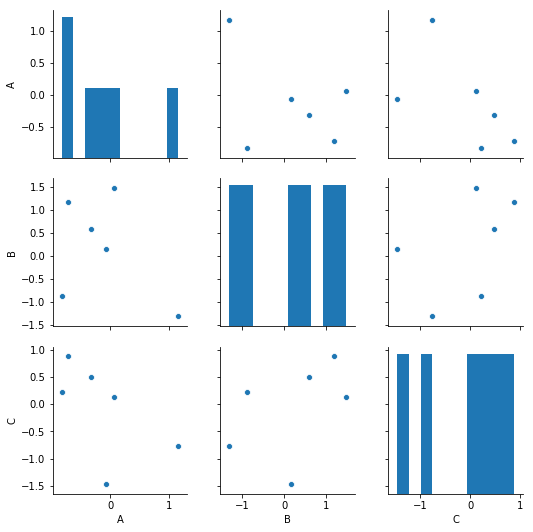

In [72]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df[["A", "B", "C"]])
plt.show()
# R + GGally: df %>% select(A, B, C) %>% ggpairs()

## Pandas vs. Tidyr

| **pandas** | **tidyr** |
| :---: | :---: |
| melt |	gather |
| pivot |	spread |

## Pandas vs. Dplyr
| **pandas** | **dplyr** |
| :---: | :---: |
| mutate |	assign |
| select |	filter |
| rename |	rename |
| filter |	query |
| arrange |	sort_values |
| group_by |	groupby |
| summarize |	agg 


## Panda read data from Kaggle by using Kaggle's API
[GitHub reference](https://github.com/kaggle/kaggle-api)

It is required the package `kaggle`
        #%%bash
        pip install kaggle --upgrade

Then it is required to **'Create API Token'** from the 
Kraggle Account.

This will trigger the download of `kaggle.json`, 
a file containing your API credentials. 

Place this file in the location `~/.kaggle/kaggle.json`

In [73]:
import kaggle
import pandas as pd
kaggle.api.authenticate()
kaggle.api.dataset_download_files('toramky/automobile-dataset', unzip=True)
car_data = pd.read_csv("Automobile_data.csv")

## Panda read data from url 

In [74]:
import pandas as pd
import io
import requests as rq

url="https://think.cs.vt.edu/corgis/csv/cars/cars.csv?forcedownload=1"
df=pd.read_csv((io.StringIO(rq.get(url).content.decode('utf-8'))))

we start by visualizing the variables, the number of observations and some of them

In [75]:
from IPython.core.display import display, HTML

print(df.columns)
display(HTML('<div>Number of observation: <font style="color: yellow;">%d</span></font>' % len(df)))
df.head(2)

Index(['City mpg', 'Classification', 'Driveline', 'Engine Type', 'Fuel Type',
       'Height', 'Highway mpg', 'Horsepower', 'Hybrid', 'ID', 'Length', 'Make',
       'Model Year', 'Number of Forward Gears', 'Torque', 'Transmission',
       'Width', 'Year'],
      dtype='object')


,City mpg,Classification,Driveline,Engine Type,Fuel Type,Height,Highway mpg,Horsepower,Hybrid,ID,Length,Make,Model Year,Number of Forward Gears,Torque,Transmission,Width,Year
0,18,Automatic transmission,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,Gasoline,140,25,250,False,2009 Audi A3 3.2,143,Audi,2009 Audi A3,6,236,6 Speed Automatic Select Shift,202,2009
1,22,Automatic transmission,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,Gasoline,140,28,200,False,2009 Audi A3 2.0 T AT,143,Audi,2009 Audi A3,6,207,6 Speed Automatic Select Shift,202,2009


In [76]:
df['Model Year'].unique()[:5]

array(['2009 Audi A3', '2009 Audi A5', '2009 Audi Q7',
       '2009 Audi A4 Sedan', '2012 Acura TL'], dtype=object)

Let us define a function to extract the _car model_ from the column `Model Year`

In [77]:
def reduce_model_year(my,y):
    return my.replace(str(y),'');

The we use the `DataFrame` method `apply` to crate the new column `model`

In [78]:
if 'model' in df.columns:       # if the column `model` has been created before
    df.drop('model', axis=1)    # drop it
df['model'] = df.apply(lambda x: reduce_model_year(x['Model Year'], x['Year']), axis=1)
df.filter(items=['Model Year', 'model']).head(3)

,Model Year,model
0,2009 Audi A3,Audi A3
1,2009 Audi A3,Audi A3
2,2009 Audi A3,Audi A3


An alternative way to make this would be by using the `assign` method together with the `numpy.vectorize`
function that is used to vectoring the function `reduce_model_year`

In [79]:
import numpy as np
if 'model' in df.columns:       # if the column `model` has been created before
    df.drop('model', axis=1)    # drop it
df = df.assign(model=lambda x: np.vectorize(reduce_model_year)(x['Model Year'], x['Year']), axis=1)
df[['Model Year', 'model']].head(3) # other way to make a filter

,Model Year,model
0,2009 Audi A3,Audi A3
1,2009 Audi A3,Audi A3
2,2009 Audi A3,Audi A3


Let us count the number of lines containing `NaNs`value

In [81]:
len(df) - df.count()

City mpg                   0
Classification             0
Driveline                  0
Engine Type                0
Fuel Type                  0
Height                     0
Highway mpg                0
Horsepower                 0
Hybrid                     0
ID                         0
Length                     0
Make                       0
Model Year                 0
Number of Forward Gears    0
Torque                     0
Transmission               0
Width                      0
Year                       0
model                      0
axis                       0
dtype: int64

### Using Group-by’s and Merges

In [82]:
group_by_model = df.groupby(by= df['model'])

In [101]:
df_count = (group_by_model 
 .agg({'ID':'count', 'Model Year':'first'})
 .rename(columns={'ID':'Count'}))
df_count.head()

,Count,Model Year
model,,
Volkswagen Routan,4,2010 Volkswagen Routan
Acura MDX,3,2010 Acura MDX
Acura RDX,4,2010 Acura RDX
Acura RL,3,2010 Acura RL
Acura TL,8,2012 Acura TL


In [102]:
df_mean = group_by_model.mean()
df_mean.head()

,City mpg,Height,Highway mpg,Horsepower,Hybrid,Length,Number of Forward Gears,Torque,Width,Year,axis
model,,,,,,,,,,,
Volkswagen Routan,16.500000,214.0,24.000000,224.000,0.0,19.0,6.000000,244.500,161.00,2010.000,1.0
Acura MDX,16.000000,197.0,21.000000,300.000,0.0,3.0,6.000000,270.000,202.00,2011.000,1.0
Acura RDX,18.000000,119.0,23.000000,240.000,0.0,27.0,5.000000,260.000,78.00,2010.500,1.0
Acura RL,16.666667,175.0,23.333333,300.000,0.0,109.0,5.666667,271.000,55.00,2011.000,1.0
Acura TL,17.750000,172.0,25.875000,295.625,0.0,91.5,5.500000,265.875,87.75,2010.875,1.0


In [103]:
alternative_method = df_mean.merge(df_count, left_index=True, right_index=True, suffixes=['_avg','_count'])

In [105]:
print(alternative_method.columns) 

Index(['City mpg', 'Height', 'Highway mpg', 'Horsepower', 'Hybrid', 'Length',
       'Number of Forward Gears', 'Torque', 'Width', 'Year', 'axis', 'Count',
       'Model Year'],
      dtype='object')


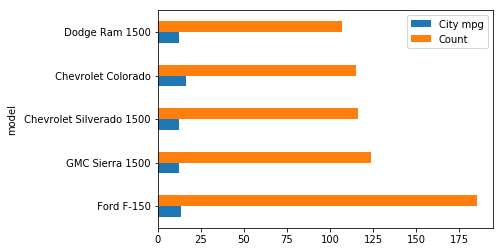

In [109]:
alternative_method[['City mpg', 'Count']].sort_values(by=['Count','City mpg'], ascending=False).head(5).plot(kind='barh')
